In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.datasets import make_blobs

In [9]:
## by default we have kept features as 2 but we can have more features then apply pca 
X,y=make_blobs(n_samples=1000, centers=3, n_features=2)

In [10]:
X

array([[ 8.40782969, -8.76440158],
       [-0.99362312,  6.30342378],
       [ 6.70740362,  7.92462588],
       ...,
       [ 5.70636172,  8.58346956],
       [ 6.77140095,  8.84853095],
       [ 7.08299378,  7.20129449]], shape=(1000, 2))

In [11]:
y

array([1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 1, 1, 2,
       2, 2, 0, 2, 0, 2, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 0, 1, 0, 2, 1, 2,
       0, 1, 2, 2, 0, 2, 1, 0, 2, 2, 0, 2, 1, 0, 1, 0, 0, 2, 0, 0, 0, 1,
       2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 0, 1, 0, 2, 0, 1,
       2, 0, 2, 1, 2, 0, 0, 1, 0, 1, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 2,
       0, 2, 0, 1, 1, 0, 2, 2, 1, 1, 0, 0, 1, 0, 0, 1, 1, 2, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 2, 0, 1,
       0, 0, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 1, 2, 1, 2, 0, 0, 0, 1, 1, 1,
       1, 1, 2, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 2, 0, 1, 1, 2, 2, 0, 0, 2,
       0, 1, 1, 1, 2, 1, 2, 2, 1, 0, 1, 0, 0, 1, 0, 0, 2, 2, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 2, 1, 0, 0, 1, 0, 1, 1, 2, 0, 0, 2, 0, 2, 2, 2, 0,
       1, 1, 0, 2, 0, 2, 1, 1, 0, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 0,
       2, 1, 2, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1, 2, 2,

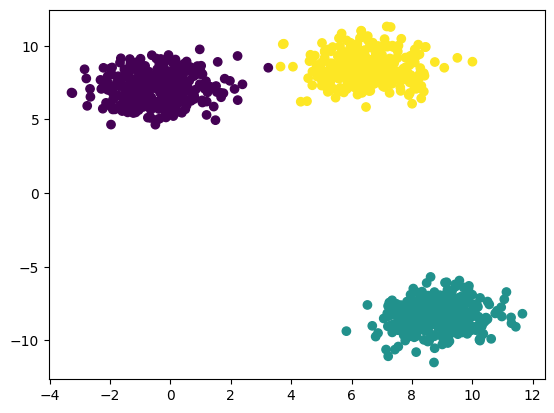

In [12]:
plt.scatter(X[:,0],X[:,1],c=y)

In [13]:
## standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [17]:
from sklearn.cluster import KMeans


In [18]:
##Elbow method
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [19]:
wcss

[1339.999999999999,
 364.75791528902295,
 48.6544308349699,
 40.407942371784564,
 32.2129550640788,
 30.24512267346578,
 22.102808847201484,
 20.147759443075593,
 18.268889474731083,
 17.175998479038995]

Text(0, 0.5, 'WCSS')

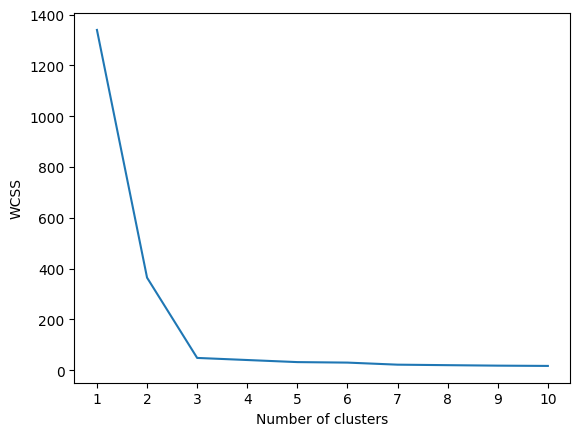

In [20]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [21]:
kmeans=KMeans(n_clusters=3,init='k-means++')

In [22]:
kmeans.fit_predict(X_train_scaled)

array([0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 1, 2, 1, 1, 0, 1, 1,
       2, 0, 0, 1, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 0, 0, 1,
       2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 1, 0, 0, 1, 0,
       1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 2, 1, 2, 0,
       0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 2, 1, 1, 0, 0, 1, 1, 1, 0, 2,
       0, 0, 2, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 2, 2, 2, 1, 0, 2,
       1, 2, 2, 2, 0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 0, 1, 1, 1, 2, 0, 1,
       2, 1, 0, 1, 0, 1, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 1, 2, 1,
       0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 0, 2, 1, 0,
       2, 2, 0, 0, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 2, 1, 2, 2, 1, 0, 1,
       0, 1, 2, 2, 1, 0, 2, 2, 1, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 1, 1, 2,
       2, 0, 1, 1, 2, 1, 2, 0, 1, 0, 0, 1, 0, 1, 0, 2, 2, 0, 0, 1, 0, 0,
       1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 1, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 1, 2, 0, 2, 2, 0, 2, 0, 1, 0, 1,

In [23]:
y_pred=kmeans.predict(X_test_scaled)

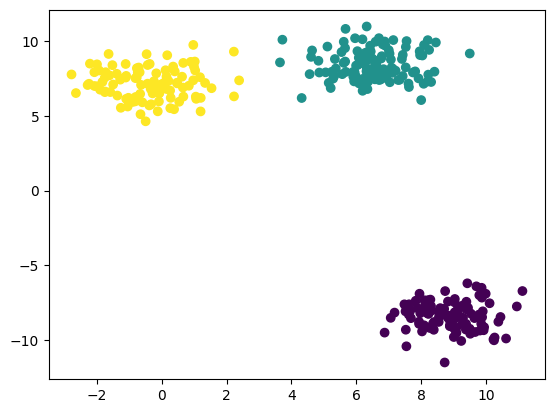

In [25]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [26]:
##Validating k values
##kneelocator
##Silhoutte scoring

In [27]:
##kneelocator
!pip install kneed

In [28]:
from kneed import KneeLocator

In [29]:
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')

In [30]:
kl.elbow

np.int64(3)

In [31]:
##silhoutte scoring
from sklearn.metrics import silhouette_score

In [32]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_scores.append(score)

In [33]:
silhouette_scores

[np.float64(0.6998990150029585),
 np.float64(0.8188170391308407),
 np.float64(0.6715651444697276),
 np.float64(0.5687035937586379),
 np.float64(0.42310674074172994),
 np.float64(0.39624204946800395),
 np.float64(0.3740694423403827),
 np.float64(0.3527165558293632),
 np.float64(0.3325318085307317)]

Text(0, 0.5, 'silhouette score')

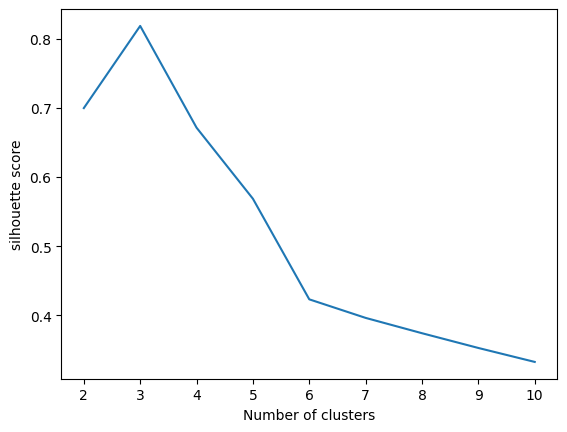

In [34]:
plt.plot(range(2,11),silhouette_scores)
plt.xticks(range(2,11))
plt.xlabel('Number of clusters')
plt.ylabel('silhouette score')